# Capstone Project

### Capstone Project - Bank Marketing Analysis

In banking sectors the profit is made through the interest collected from the customers who have taken a loan, who has an account in our bank. To increase the profit margins more customers are to to attracted to subscribe to our products or schemes. This can be done by analysing the market conditions and the history of a bank's data. New clients should be added and existing ones should be retained. This can be done by the rigorous analysis of the bank data appropriately.

One such scheme in a bank is Term Deposit. In this the bank offers short term loans to the clients to pay the amount back in less time with considerately better interset rate. We have to initiate a marketing activity to scout for clients and make them convinced to subscribe to the term deposit.

The following project requires us to predict the client who is more likely to subscribe to our term deposit based on the data collected previously. 

This project is provided with a Bank Marketing dataset which has the following attributes:

1. Age 

2. Job : type of job admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

3. Marital : marital status ("divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4. Education ("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5. Default: Does the customer have credit in default? ( "no","yes","unknown")

6. Balance: balance of the customer

7. Housing: Does the customer have a housing loan? ("no","yes","unknown")

8. Loan: Does the customer have a personal loan? "no","yes","unknown")

9. Contact: contact communication type ("cellular","telephone") 

10. Month: last contact month of year ("jan", "feb", "mar", ..., "nov", "dec")

11. Day: last contact day of the week ("mon","tue","wed","thu","fri")

12. Duration: last contact duration, in seconds. Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call ‘y’ is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

13. Campaign: Number of contacts performed during this campaign and for this client includes last contact

14. pdays: Number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)

15. Previous: number of contacts performed before this campaign and for this client

16. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

17. y - has the client subscribed to a term deposit? ("yes","no")

In [1]:
# Importing Libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the csv files
ds1 = pd.read_csv('/content/bank.csv', sep = ';', header = None)
ds2 = pd.read_csv('/content/bank-full.csv', sep = ';', header = None, low_memory = False)

In [3]:
# 1st dataset
ds1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no


In [4]:
# 2nd dataset
ds2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no


Both the datasets have column names printed in the first row.

So now we're going to rename the columns and delete the 0th row.

In [5]:
# Adding the column names to the dataset ds1
ds1.head()
column_names=["Age","Job","Marital","Education","Default","Balance","Housing","Loan","Contact","Day","Month","Duration","Campaign","Pdays","Previous","pOutcome","y"]
ds1.columns=column_names
ds1.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,pOutcome,y
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no


In [6]:
# Dropping the first row from the dataset ds1
ds1.drop([0], axis = 0, inplace = True)
ds1.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,pOutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
# No.of rows and columns in ds1
ds1.shape

(4521, 17)

In [8]:
# Adding the column names to the dataset ds2
ds2.head()
column_names=["Age","Job","Marital","Education","Default","Balance","Housing","Loan","Contact","Day","Month","Duration","Campaign","Pdays","Previous","pOutcome","y"]
ds2.columns=column_names
ds2.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,pOutcome,y
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no


In [9]:
# Dropping the first row from the dataset ds2
ds2.drop([0], axis = 0, inplace = True)
ds2.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,pOutcome,y
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
# No.of rows and columns in ds2
ds2.shape

(45211, 17)

In [11]:
# Let's merge the both dataset into one
df = pd.concat([ds1,ds2])
df.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,pOutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [12]:
# Now let's look at no.of rows and columns in this new dataset
df.shape

(49732, 17)

So, there are 49732 rows and 17 columns in the new dataset that is merged.

In [13]:
# Lets look at the datatypes in the dataset
df.dtypes

Age          object
Job          object
Marital      object
Education    object
Default      object
Balance      object
Housing      object
Loan         object
Contact      object
Day          object
Month        object
Duration     object
Campaign     object
Pdays        object
Previous     object
pOutcome     object
y            object
dtype: object

As all the datatypes are not appropriate we have to manipulate some columns and asign them their respective datatypes.

The following datatypes will be converted into integer datatype:

1. Age
2. Balance
3. Day
4. Duration
5. Campaign
6. Pdays
7. Previous

In [14]:
# Changing the dtypes of cetain columns using the lambda function
df[["Age","Balance","Day","Duration","Campaign","Pdays","Previous"]] =df[["Age","Balance","Day","Duration","Campaign","Pdays","Previous"]].apply(lambda x: x.astype('int64'))

In [15]:
# Lets look at the result 
df.dtypes

Age           int64
Job          object
Marital      object
Education    object
Default      object
Balance       int64
Housing      object
Loan         object
Contact      object
Day           int64
Month        object
Duration      int64
Campaign      int64
Pdays         int64
Previous      int64
pOutcome     object
y            object
dtype: object

In [16]:
# Cheching the no.of null values in each cloumn
df.isnull().sum()

Age          0
Job          0
Marital      0
Education    0
Default      0
Balance      0
Housing      0
Loan         0
Contact      0
Day          0
Month        0
Duration     0
Campaign     0
Pdays        0
Previous     0
pOutcome     0
y            0
dtype: int64

There are no null values in the entire dataset.


In [17]:
# Checking for any duplicate rows and eliminating them
df = df.drop_duplicates( keep='first')
df.shape

(45211, 17)

So there were around 4521 rows which are duplicate so we removed them.

In [18]:
# Checking for unwanted 0s in all columns 
df.eq(0).sum()

Age              0
Job              0
Marital          0
Education        0
Default          0
Balance       3514
Housing          0
Loan             0
Contact          0
Day              0
Month            0
Duration         3
Campaign         0
Pdays            0
Previous     36954
pOutcome         0
y                0
dtype: int64

As the balance and Previous variables are meaningful to have 0s we don't have to do anything to the data

In [19]:
df.describe()

,Age,Balance,Day,Duration,Campaign,Pdays,Previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


As the Balance has negative values we replace all the negative values with 0 to make the Balance column meaningful

In [20]:
# Replacing the negative values with 0
df['Balance'] = np.where(df['Balance'] < 0, 0, df['Balance'])
df.describe()

,Age,Balance,Day,Duration,Campaign,Pdays,Previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1388.734069,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3029.530442,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


All the negative values have been removed from the Balance and replaced with 0.

Let's proceed to Exploratory Data Analysis.

### Univariate Analysis

###### Univariate analysis of Categorical variables

no     39922
yes     5289
Name: y, dtype: int64

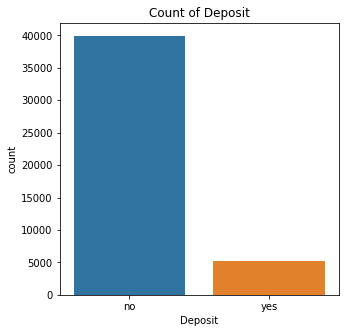

In [21]:
# Plotting a Bar Graph for the outcome variable Deposit

plt.figure(figsize=(5,5))
sns.countplot(x='y', data =df)
plt.xlabel('Deposit')
plt.title('Count of Deposit')
df['y'].value_counts()

There are 5289 clients who purchased our bank's term deposit and 39992 other customers who didn't.

Let's see what are the factors that made the cients purchase our product and what didn't:

Text(0.5, 1.0, 'Outcome of pOutcome')

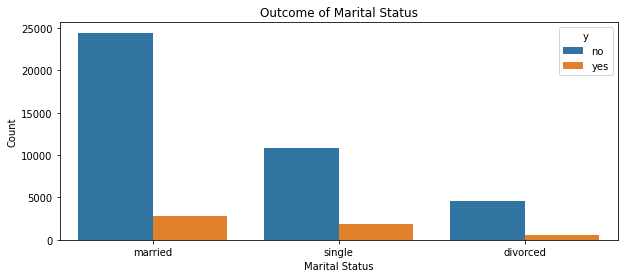

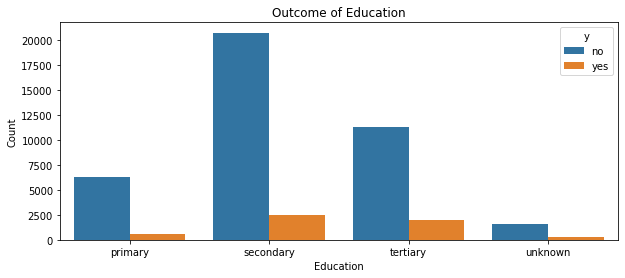

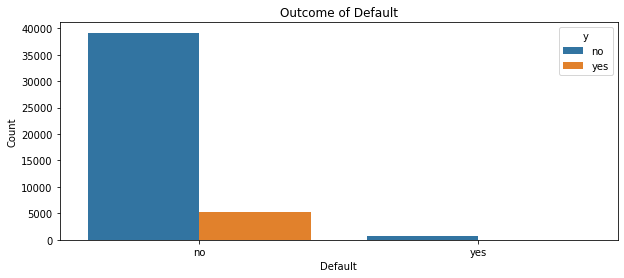

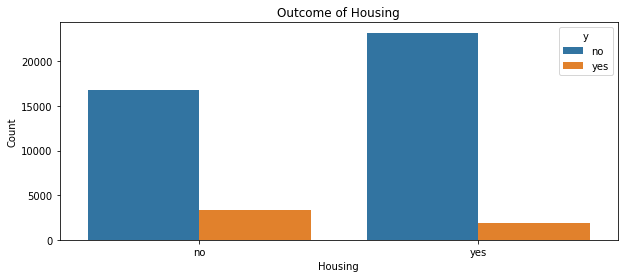

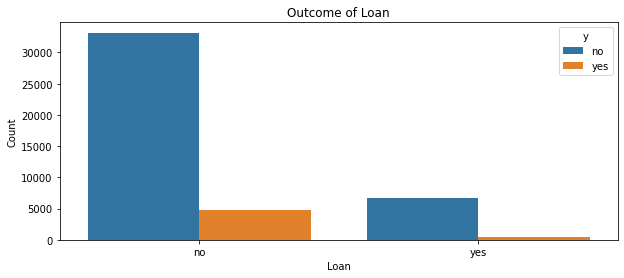

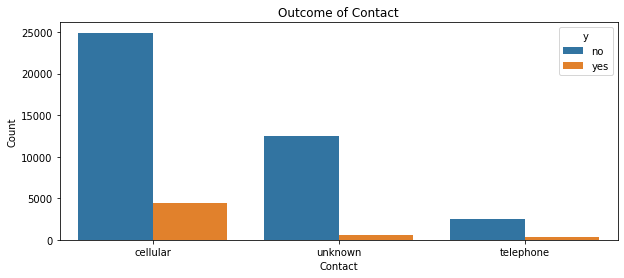

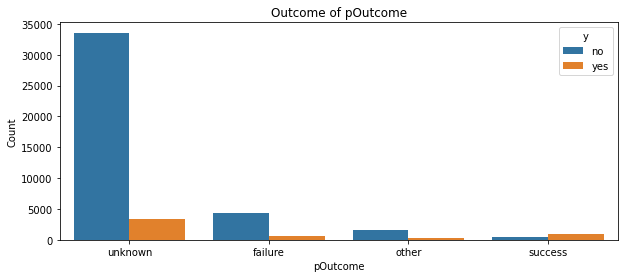

In [22]:
# Univariate Analysis of all Categorical Variables w.r.to our outcome variable i.e, 'y'

plt.figure(figsize=(10,4))
sns.countplot(x='Marital',hue = 'y', data =df)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Outcome of Marital Status')

plt.figure(figsize=(10,4))
sns.countplot(x='Education',hue = 'y', data =df)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Outcome of Education')

plt.figure(figsize=(10,4))
sns.countplot(x='Default',hue = 'y', data =df)
plt.xlabel('Default')
plt.ylabel('Count')
plt.title('Outcome of Default')

plt.figure(figsize=(10,4))
sns.countplot(x='Housing',hue = 'y', data =df)
plt.xlabel('Housing')
plt.ylabel('Count')
plt.title('Outcome of Housing')

plt.figure(figsize=(10,4))
sns.countplot(x='Loan',hue = 'y', data =df)
plt.xlabel('Loan')
plt.ylabel('Count')
plt.title('Outcome of Loan')

plt.figure(figsize=(10,4))
sns.countplot(x='Contact',hue = 'y', data =df)
plt.xlabel('Contact')
plt.ylabel('Count')
plt.title('Outcome of Contact')

plt.figure(figsize=(10,4))
sns.countplot(x='pOutcome',hue = 'y', data =df)
plt.xlabel('pOutcome')
plt.ylabel('Count')
plt.title('Outcome of pOutcome')

###### Conclusions from the univariate analysis

1. From marital status we can say that married customers are more likely to subsribe to the term deposit followed by unmarried and then divorced.

2. The secondary Educational qualification gave us the most subsriptions followed by tertiary. The primary and unkbown educational qualifications are the least subscribed clients.

3. The clients whose credits have defalted didn't subscribe to our deposit. The credit defaut clients should be avoided.

4. Most people with no housing loan are interested in our subscription than the clients who are under an ongoing housing loan.

5. The clients with an ongoing loan are more prone not to subsribe to the term deposit so as not to increase their already mortgage.

6. Contact made via cellular has the best outcome of subscription when compared to the unknown means and telephone communication.

7. The client whose previous outcome is successful will subscribe to the term deposit than the clients without any previous outcome.

### Feature Engineering and Bi-Variate, Multivariate Analysis

##### Feature 1: Age

In this feature we wll divide the age into different categories:

1. Ages between 0-24 are known as young

2. Ages between 25-35 are known as adults

3. Ages between 35 and 50 are MidAged

4. Aged above 50 are old

In [23]:
def set_age(row):
    if row["Age"] < 25:
        return "Young"
    elif row["Age"] >= 25 and row["Age"] < 35:
        return "Adults"
    elif row["Age"] >= 35 and row["Age"] < 60:
        return "MidAged"
    elif row["Age"] >= 60  :
        return "Old"
df1 = df.assign(Age_div=df.apply(set_age, axis=1))
df1.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,pOutcome,y,Age_div
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Adults
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Adults
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,MidAged
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Adults
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,MidAged


Text(0.5, 1.0, 'Outcome based on Age Groups')

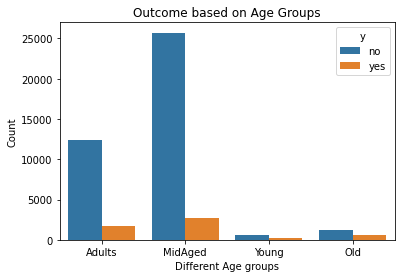

In [24]:
# Let's see which age group has subscribed to our deposit the most

sns.countplot(x='Age_div', hue = 'y', data = df1)
plt.xlabel('Different Age groups')
plt.ylabel('Count')
plt.title('Outcome based on Age Groups')

The Mid aged and adults are the age groups of people who subsribed to our deposit the most. Also we can see that they were our target audience earlier.

The old aged customers are most subsribed when we look percentage wise, i.e, most of the old age clients are keen to subscribe to our deposit when compared to other aged groups.



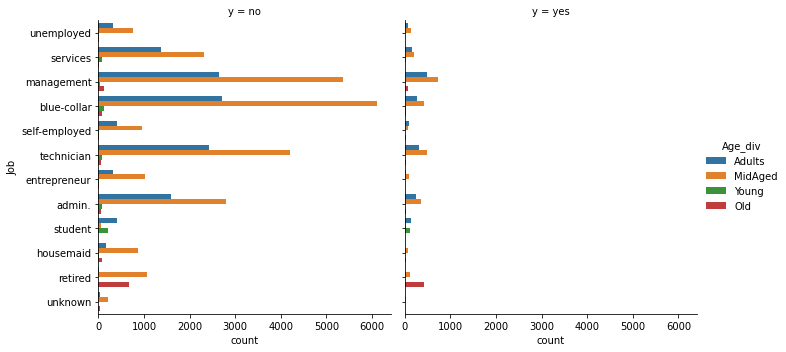

In [25]:
# Lets look at the occupation of the people age wise and their subsription

sns.catplot(y='Job', hue='Age_div', col = 'y',kind = 'count', data = df1)


We can observe that most of the people who are employed are Adults and mid aged groups. The other aged groups yound and old are in little number in some proffesions.

We can also observe that all the unemployed are Adults and Midaged. So all the young and the old aged are working in some or the other profession.

#### ***Feature 2- Day***

We'll divide the days into weeks:

1. From day 1-7 it is Week1

2. From day 8-14 it is week 2

3. From day 15-21 it is week 3

4. Days above 21 is week4

In [26]:
def set_day(row):
    if row["Day"] >= 1 and row["Day"] < 8 :
        return "Week1"
    elif row["Day"] >= 8 and row["Day"] < 15:
        return "Week2"
    elif row["Day"] >= 15 and row["Day"] < 22:
        return "Week3"
    elif row["Day"] >= 22  :
        return "Week4"
df1 = df1.assign(Day_div=df.apply(set_day, axis=1))
df1.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,pOutcome,y,Age_div,Day_div
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Adults,Week3
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Adults,Week2
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,MidAged,Week3
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Adults,Week1
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,MidAged,Week1


Text(0.5, 1.0, 'Subscription based on week of a month')

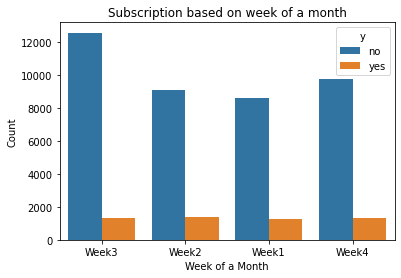

In [27]:
# Let's see in what week our subscription probability is more

sns.countplot(x='Day_div',hue='y',data=df1)
plt.xlabel('Week of a Month')
plt.ylabel('Count')
plt.title('Subscription based on week of a month')

All the weeks are equally contributing when it comes to the subscription overall.

But this data is insufficient to describe the time patters of a customer so we'll see this in terms of months.

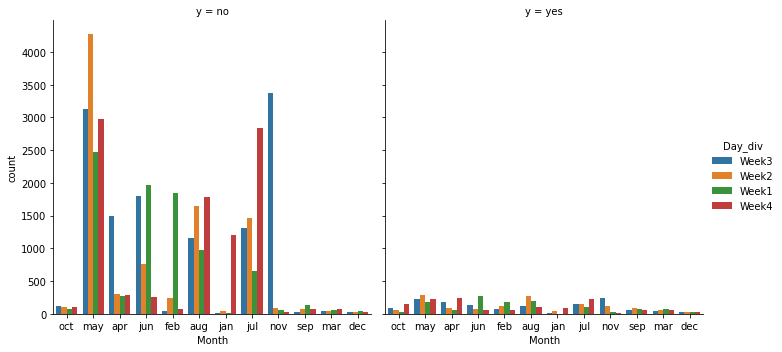

In [28]:
sns.catplot(x='Month', hue='Day_div', col = 'y',kind = 'count', data = df1)

May is the month where most of the customers were contacted whereas December is the month least customer intraction is donr.

The months April, May, June, July, August are the most contributing in a year, this is generally summer.


##### Feature 3- Campaign

In this feature we will check for the outliers and replace them with appropriate arithematic function.

In [29]:
df1.describe()

,Age,Balance,Day,Duration,Campaign,Pdays,Previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1388.734069,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3029.530442,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Text(0.5, 1.0, 'Checking outliers if any')

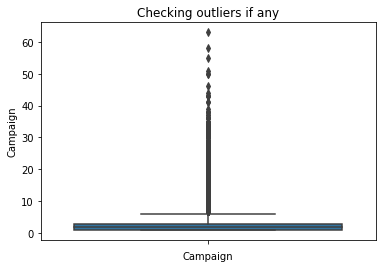

In [30]:
# Checcking for outliers using boxplot
sns.boxplot(y='Campaign',data=df1,hue='y')
plt.xlabel('Campaign')
plt.title('Checking outliers if any')


In [31]:
# Let's look at all the values in the Campaign column
np.unique(df1['Campaign'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 41, 43, 44, 46, 50, 51, 55, 58, 63])

In [32]:
Q1 = np.percentile(df1['Campaign'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df1['Campaign'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1['Campaign'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)
outlier =[]
for x in df1['Campaign']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

Interquartile range is 2.0
low_limit is -2.0
up_limit is 6.0
 outlier in the dataset is [18, 10, 9, 7, 12, 14, 10, 7, 7, 12, 13, 24, 7, 11, 7, 7, 8, 24, 10, 8, 10, 9, 29, 13, 32, 9, 13, 13, 10, 7, 7, 8, 8, 8, 13, 10, 8, 10, 7, 16, 13, 10, 9, 9, 8, 8, 8, 22, 7, 11, 12, 13, 22, 8, 11, 7, 11, 11, 13, 7, 16, 9, 18, 14, 15, 7, 12, 10, 7, 8, 8, 8, 7, 7, 8, 9, 16, 15, 7, 9, 30, 7, 11, 25, 9, 11, 7, 13, 21, 15, 11, 8, 7, 7, 11, 8, 13, 11, 7, 17, 8, 12, 8, 8, 7, 7, 7, 8, 12, 12, 9, 11, 10, 8, 14, 7, 14, 12, 7, 9, 12, 7, 8, 10, 8, 10, 7, 8, 18, 7, 17, 8, 19, 12, 8, 7, 7, 10, 24, 7, 14, 8, 16, 12, 12, 8, 9, 8, 14, 9, 17, 10, 25, 7, 15, 7, 10, 14, 25, 17, 25, 9, 7, 13, 12, 10, 9, 23, 8, 17, 20, 9, 9, 8, 50, 9, 10, 12, 10, 12, 7, 7, 9, 12, 11, 9, 9, 10, 8, 10, 10, 11, 7, 7, 7, 11, 13, 7, 7, 8, 13, 7, 28, 11, 11, 18, 16, 15, 8, 18, 10, 32, 7, 11, 14, 18, 8, 7, 9, 8, 20, 7, 7, 8, 7, 31, 18, 8, 8, 7, 8, 7, 7, 19, 7, 8, 17, 7, 11, 9, 12, 16, 7, 15, 7, 7, 16, 7, 8, 9, 8, 7, 10, 8, 8, 7, 9, 8, 9, 13, 21,

In [33]:
mean = df1.Campaign.mean()
mean

2.763840658246887

In [34]:
df1['Campaign'] = np.where(df1['Campaign'] > 6,mean, df1['Campaign'])
df1.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,pOutcome,y,Age_div,Day_div
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no,Adults,Week3
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1.0,339,4,failure,no,Adults,Week2
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1.0,330,1,failure,no,MidAged,Week3
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4.0,-1,0,unknown,no,Adults,Week1
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1.0,-1,0,unknown,no,MidAged,Week1


Text(0.5, 1.0, 'Campaign Plot')

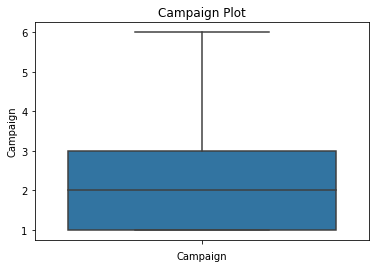

In [35]:
# Boxplot of campaign variable
sns.boxplot(y='Campaign',data=df1,hue='y')
plt.xlabel('Campaign')
plt.title('Campaign Plot')

In [36]:
np.unique(df1['Campaign'])

array([1.        , 2.        , 2.76384066, 3.        , 4.        ,
       5.        , 6.        ])

The outliers in the Campaign column are successfully replaced with the mean.

##### Feature 4 - Duration

This feature gives us the time(in seconds) spent in a conversation with the customer.

Dividing the time into three parts:

1. Duration < 1200 is 30mins

2. Duration >1200 and <3600 is 1hour

3. Duration > 3600 is 1hour+

In [37]:
def set_time(row):
    if row["Duration"] >= 1 and row["Duration"] <= 1200 :
        return "30min"
    elif row["Duration"] > 1200 and row["Duration"] <= 3600:
        return "1hour"
    elif row["Duration"] > 3600  :
        return "1hour+"
df1 = df1.assign(Dur_div=df1.apply(set_time, axis=1))
df1.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,pOutcome,y,Age_div,Day_div,Dur_div
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no,Adults,Week3,30min
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1.0,339,4,failure,no,Adults,Week2,30min
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1.0,330,1,failure,no,MidAged,Week3,30min
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4.0,-1,0,unknown,no,Adults,Week1,30min
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1.0,-1,0,unknown,no,MidAged,Week1,30min


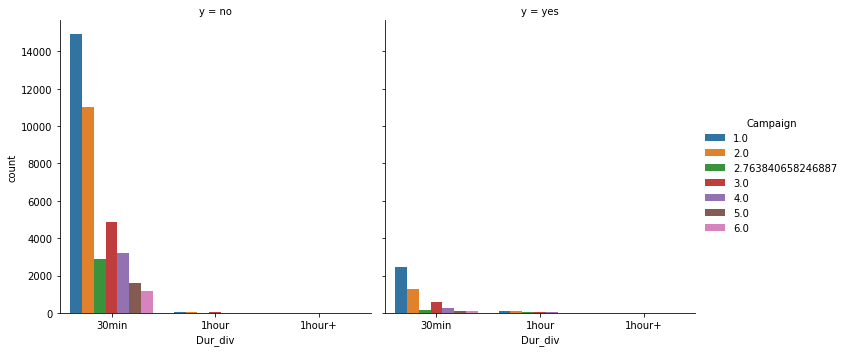

In [38]:
# Barplot between duration and outcome w.r.to campaign
sns.catplot(x='Dur_div', hue='Campaign',col = 'y',kind = 'count', data = df1)

The customers who were contacted once and twice and had an interaction less than 30mins are most subscribed to our deposit.

There are very few people who took deposit having a duration of 1 hour or less.

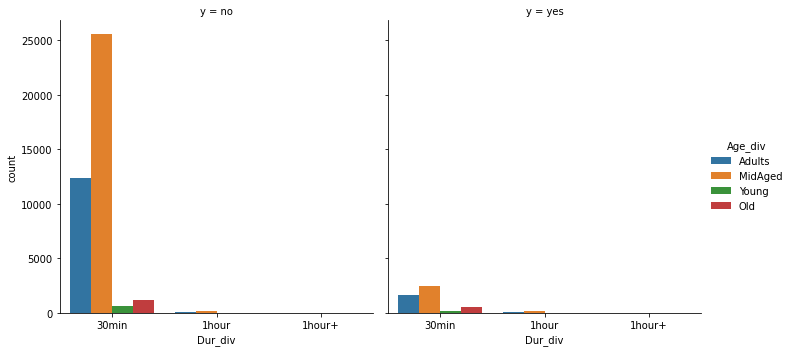

In [39]:
# Barplot between duration and outcome w.r.to Age_div
sns.catplot(x='Dur_div', hue='Age_div',col = 'y',kind = 'count', data = df1)

By the above graph we can say that Young and Old aged customers are most likely to subscribe to the deposit under 30 minutes of calls.

So the ideal duration with a customer should be less than 30 minutes across all ages thus improving productivity in retaining and adding new customers.

## **Summary**

The clients who are more likely to subsribe to our term deposit are the ones who fall under the following categories:

1. Based on Season:
Potential clients opted to suscribe term deposits during the season of summer.

2. Months of Marketing Activity:
We saw that the the month of highest level of marketing activity was the month of May. 

3. Campaign Calls:
We should make an important descition that no more than 3 calls should be made to the same potential client in order to save time and effort in getting new potential clients.

4. Age Category:
The next marketing campaign of the bank should target potential clients in their 20s or younger and 60s or older. The youngest category and the oldest has the highest chance of suscribing to a term deposit.

5. Occupation:
We can observe that potential clients were students or retired are the most likely to suscribe to a term deposit. Retired individuals, tend to have more term deposits in order to gain some cash through interest payments. Remember, term deposits are short-term loans in which the individual (in this case the retired person) agrees not to withdraw the cash from the bank until a certain date agreed between the individual and the financial institution. After that time the individual gets its capital back and its interest made on the loan. Students were the other group that used to suscribe term deposits.

### Target and Improvements in Marketing

The following activities should be implemented/improved for better marketing :

1. Seasons other than summer should be more focussed for improvement.

2. For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of March, September, October and December.

3. Divorced clients should be less focussed as their subscription percentage is very less.

4. Students and Retired individuals should be of the target clients in the next marketing campaign.

In [39]:
# Downloading the cleaned Dataset for exporting it into MySQL workbench for further analysis

from google.colab import files
df.to_csv('bank_df.csv', encoding = 'utf-8-sig') 
files.download('bank_df.csv')
